# Fig_8_Administrative_Waste_dtilde_Robustness_Heatmaps

In [3]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.special import lambertw
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors
import warnings
import pickle
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import ipynb.fs.defs.Functions_Equations_Equilibrium_Simulation as baseFuncs
import ipynb.fs.defs.Functions_Equilibria_Along_Parameters as planeFuncs
import ipynb.fs.defs.Functions_Behavioral_Stability as stabFuncs

## Evaluating the performance plane for three distinct variables

In [4]:
para0 = baseFuncs.paraReset()
param_x_label0 = "dtilde"
param_y_label0 = "k_P"
bnds0 = ((0, 1),(8, 360))
param_x_mesh0 = 21
param_y_mesh0 = 21
init_mesh0 = 15

para1 = baseFuncs.paraReset()
param_x_label1 = "dtilde"
param_y_label1 = "gamma_c"
bnds1 = ((0, 1),(0.005, 0.995))
param_x_mesh1 = 21
param_y_mesh1 = 21
init_mesh1 = 15

para2 = baseFuncs.paraReset()
param_x_label2 = "dtilde"
param_y_label2 = "gamma_p"
bnds2 = ((0, 1),(0.01, 0.99))
param_x_mesh2 = 21
param_y_mesh2 = 21
init_mesh2 = 15

In [ ]:
# First Panel
output0 = planeFuncs.evaluatePerformancePlane(para0, param_x_label0, param_y_label0, bnds = bnds0, 
                                  param_x_mesh = param_x_mesh0, param_y_mesh = param_y_mesh0, init_mesh = init_mesh0)

filename0 = f"PerformanceGrid for {param_x_mesh0}x{param_y_mesh0} for {param_x_label0} in {bnds0[0][0]} to {bnds0[0][1]} and {param_y_label0} in {bnds0[1][0]} to {bnds0[1][1]} with init_mesh {init_mesh0} data"
file0 = open(f"{filename0}", 'wb')
pickle.dump((para0, output0), file0)
file0.close()

# Second Panel
output1 = planeFuncs.evaluatePerformancePlane(para1, param_x_label1, param_y_label1, bnds = bnds1, 
                                  param_x_mesh = param_x_mesh1, param_y_mesh = param_y_mesh1, init_mesh = init_mesh1)

filename1 = f"PerformanceGrid for {param_x_mesh1}x{param_y_mesh1} for {param_x_label1} in {bnds1[0][0]} to {bnds1[0][1]} and {param_y_label1} in {bnds1[1][0]} to {bnds1[1][1]} with init_mesh {init_mesh1} data"
file1 = open(f"{filename1}", 'wb')
pickle.dump((para1, output1), file1)
file1.close()

# Third Panel
output2 = planeFuncs.evaluatePerformancePlane(para2, param_x_label2, param_y_label2, bnds = bnds2, 
                                  param_x_mesh = param_x_mesh2, param_y_mesh = param_y_mesh2, init_mesh = init_mesh2)

filename2 = f"PerformanceGrid for {param_x_mesh2}x{param_y_mesh2} for {param_x_label2} in {bnds2[0][0]} to {bnds2[0][1]} and {param_y_label2} in {bnds2[1][0]} to {bnds2[1][1]} with init_mesh {init_mesh2} data"
file2 = open(f"{filename2}", 'wb')
pickle.dump((para2, output2), file2)
file2.close()

## Or load the saved data

In [5]:
# First Panel
filename0 = f"PerformanceGrid for {param_x_mesh0}x{param_y_mesh0} for {param_x_label0} in {bnds0[0][0]} to {bnds0[0][1]} and {param_y_label0} in {bnds0[1][0]} to {bnds0[1][1]} with init_mesh {init_mesh0} data"
file0 = open(f"{filename0}", 'rb')
para0, output0 = pickle.load(file0)
file0.close()

# Second Panel
filename1 = f"PerformanceGrid for {param_x_mesh1}x{param_y_mesh1} for {param_x_label1} in {bnds1[0][0]} to {bnds1[0][1]} and {param_y_label1} in {bnds1[1][0]} to {bnds1[1][1]} with init_mesh {init_mesh1} data"
file1 = open(f"{filename1}", 'rb')
para1, output1 = pickle.load(file1)
file1.close()

# Third Panel
filename2 = f"PerformanceGrid for {param_x_mesh2}x{param_y_mesh2} for {param_x_label2} in {bnds2[0][0]} to {bnds2[0][1]} and {param_y_label2} in {bnds2[1][0]} to {bnds2[1][1]} with init_mesh {init_mesh2} data"
file2 = open(f"{filename2}", 'rb')
para2, output2 = pickle.load(file2)
file2.close()

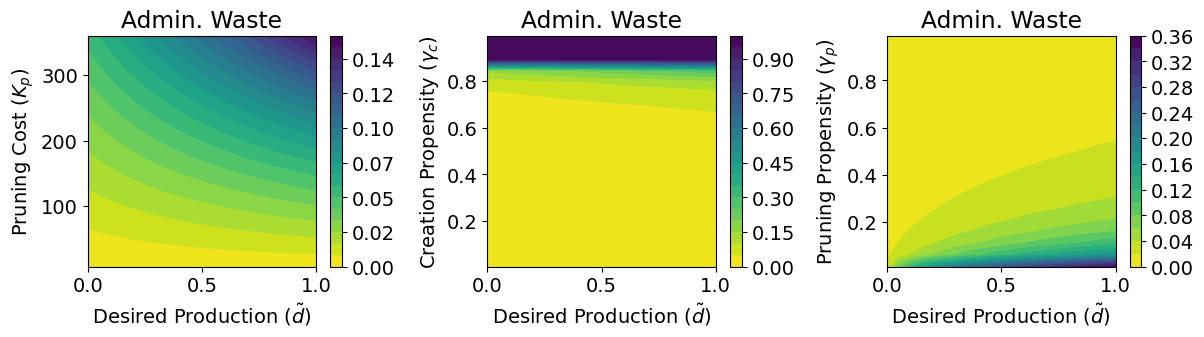

In [7]:
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1,3, figsize = (14,3))
levels = 21

axs[0].set_title("Admin. Waste")
p0 = axs[0].contourf(output0['param_x_grid'], output0['param_y_grid'], output0['prop_Ro_grid']*output0['prop_wA_grid'], levels = levels, cmap = "viridis_r")
axs[0].set_xlabel(r"Desired Production ($\tilde{d}$)")
axs[0].set_ylabel(r"Pruning Cost ($K_p$)")
fig.colorbar(p0, ax=axs[0], format=tkr.FormatStrFormatter('%.2f'))

axs[1].set_title("Admin. Waste")
p1 = axs[1].contourf(output1['param_x_grid'], output1['param_y_grid'], output1['prop_Ro_grid']*output1['prop_wA_grid'], levels = levels, cmap = "viridis_r")
axs[1].set_xlabel(r"Desired Production ($\tilde{d}$)")
axs[1].set_ylabel(r"Creation Propensity ($\gamma_c$)")
fig.colorbar(p1, ax=axs[1], format=tkr.FormatStrFormatter('%.2f'))

axs[2].set_title("Admin. Waste")
p2 = axs[2].contourf(output2['param_x_grid'], output2['param_y_grid'], output2['prop_Ro_grid']*output2['prop_wA_grid'], levels = levels, cmap = "viridis_r")
axs[2].set_xlabel(r"Desired Production ($\tilde{d}$)")
axs[2].set_ylabel(r"Pruning Propensity ($\gamma_p$)")
fig.colorbar(p2, ax=axs[2], format=tkr.FormatStrFormatter('%.2f'))

plt.subplots_adjust(wspace = 0.4)

#plt.savefig("Fig_8_Administrative_Waste_dtilde_Robustness_Heatmaps.png", dpi = 200, bbox_inches = "tight")
plt.show()